# NYC Short-Term Rental Insights

You work as a Data Analyst for a real estate start-up (Pillow Palooza). The main objective of your job is to provide insight into the short-term rental market in New York City. In a competitive market, it is your goal to help the start-up identify opportunities for growth and success.

Questions solved during the analysis:
1. What are the most popular neighborhoods for short-term rentals in New York City?
2. What is the average rental price for short-term rentals in New York City, and how does it vary by neighborhood and property type?
3. What are the most commonly rented property types on Airbnb in New York City, and how does this vary by neighborhood?
4. What is the average length of stay for short-term rentals in New York City, and how does this vary by neighborhood and property type?
5. How has demand for short-term rentals in New York City changed over time, and are there any seasonal trends that could impact business decisions?

### Step 1. Open the data file and study the general information. 

In [8]:
import pandas as pd 
import seaborn as sns
import statistics 
import matplotlib.pyplot as plt
from pandas import Series
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
df_room_types = pd.read_csv(r'C:\Users\priya\Downloads\room_type.csv')
df_reviews = pd.read_csv(r'C:\Users\priya\Downloads\reviews.csv')
df_price = pd.read_csv(r'C:\Users\priya\Downloads\price.csv')
df_room_types.head(30)
df_reviews.head(30)
df_price.head(30)


,Unnamed: 0,listing_id,price,borough,neighbourhood,price_per_month,latitude,longitude
0,0,2595,225,Manhattan,Midtown,6843.750000,40.75362,-73.98377
1,1,3831,89,Brooklyn,Clinton Hill,2707.083333,40.68514,-73.95976
2,2,5099,200,Manhattan,Murray Hill,6083.333333,40.74767,-73.97500
3,3,5178,79,Manhattan,Hell's Kitchen,2402.916667,40.76489,-73.98493
4,4,5238,150,Manhattan,Chinatown,4562.500000,40.71344,-73.99037
5,5,5295,135,Manhattan,Upper West Side,4106.250000,40.80316,-73.96545
6,6,5441,85,Manhattan,Hell's Kitchen,2585.416667,40.76076,-73.98867
7,7,5803,89,Brooklyn,South Slope,2707.083333,40.66829,-73.98779
8,8,6021,85,Manhattan,Upper West Side,2585.416667,40.79826,-73.96113
9,9,6848,140,Brooklyn,Williamsburg,4258.333333,40.70837,-73.95352


In [17]:
# combining all three tables using joins
# Use the merge() function to join df1 and df2 on the 'key_column'
merged_df = pd.merge(df_reviews, df_price, on='listing_id', how='inner')
merged_df_1 = pd.merge(merged_df, df_room_types, on='listing_id', how='inner')
print(merged_df_1)

       Unnamed: 0_x  listing_id    host_name last_review  minimum_nights  \
0                 0        2595     Jennifer  21/05/2019               1   
1                 1        3831  LisaRoxanne  05/07/2019               1   
2                 2        5099        Chris  22/06/2019               3   
3                 3        5178     Shunichi  24/06/2019               2   
4                 4        5238          Ben  09/06/2019               1   
...             ...         ...          ...         ...             ...   
25197         25204    36425863        Rusaa  07/07/2019               1   
25198         25205    36427429         H Ai  07/07/2019               1   
25199         25206    36438336          Ben  07/07/2019               1   
25200         25207    36442252       Blaine  07/07/2019               1   
25201         25208    36455809    Christine  08/07/2019               1   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0       

In [18]:
df_room_types.describe(include = 'all')
df_reviews.describe(include = 'all')
df_price.describe(include = 'all')
merged_df_1.describe(include = 'all')

,Unnamed: 0_x,listing_id,host_name,last_review,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,booked_days_365,Unnamed: 0_y,price,borough,neighbourhood,price_per_month,latitude,longitude,Unnamed: 0,description,room_type
count,25202.000000,2.520200e+04,25194,25202,25202.000000,25202.000000,25202.000000,25202.000000,25202.000000,25202.000000,25202.000000,25202.000000,25202,25202,25202.000000,25202.000000,25202.000000,25202.000000,25192,25202
unique,NaN,NaN,7363,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,216,NaN,NaN,NaN,NaN,24939,3
top,NaN,NaN,Michael,23/06/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brooklyn,Bedford-Stuyvesant,NaN,NaN,NaN,NaN,Home away from home,entire home/apt
freq,NaN,NaN,215,1412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10460,2206,NaN,NaN,NaN,NaN,10,13266
mean,12604.403579,2.068920e+07,NaN,NaN,4.896715,40.210856,1.973993,6.147766,146.392747,218.607253,12604.403579,141.817316,NaN,NaN,4313.610031,40.727145,-73.947975,12604.403579,NaN,NaN
std,7278.324661,1.103081e+07,NaN,NaN,10.406988,55.319896,1.796687,31.359090,127.132444,127.132444,7278.324661,147.350650,NaN,NaN,4481.915598,0.056304,0.050951,7278.324661,NaN,NaN
min,0.000000,2.595000e+03,NaN,NaN,1.000000,1.000000,0.020000,1.000000,0.000000,0.000000,0.000000,10.000000,NaN,NaN,304.166667,40.506410,-74.244420,0.000000,NaN,NaN
25%,6300.250000,1.202115e+07,NaN,NaN,1.000000,5.000000,0.650000,1.000000,22.000000,96.000000,6300.250000,69.000000,NaN,NaN,2098.750000,40.687400,-73.982608,6300.250000,NaN,NaN
50%,12607.500000,2.234547e+07,NaN,NaN,2.000000,18.000000,1.460000,1.000000,116.000000,249.000000,12607.500000,105.000000,NaN,NaN,3193.750000,40.721050,-73.953000,12607.500000,NaN,NaN
75%,18907.750000,3.037697e+07,NaN,NaN,4.000000,53.000000,2.840000,2.000000,269.000000,343.000000,18907.750000,175.000000,NaN,NaN,5322.916667,40.762577,-73.929733,18907.750000,NaN,NaN


In [39]:
print(merged_df_1.head(30))

    Unnamed: 0_x  listing_id         host_name last_review  minimum_nights  \
0              0        2595          Jennifer  21/05/2019               1   
1              1        3831       LisaRoxanne  05/07/2019               1   
2              2        5099             Chris  22/06/2019               3   
3              3        5178          Shunichi  24/06/2019               2   
4              4        5238               Ben  09/06/2019               1   
5              5        5295              Lena  22/06/2019               5   
6              6        5441              Kate  23/06/2019               2   
7              7        5803            Laurie  24/06/2019               4   
8              8        6021           Claudio  05/07/2019               2   
9              9        6848     Allen & Irina  29/06/2019               2   
10            10        7097              Jane  28/06/2019               2   
11            11        7322              Doti  01/07/2019      

In [23]:
merged_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25202 entries, 0 to 25201
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0_x                    25202 non-null  int64  
 1   listing_id                      25202 non-null  int64  
 2   host_name                       25194 non-null  object 
 3   last_review                     25202 non-null  object 
 4   minimum_nights                  25202 non-null  int64  
 5   number_of_reviews               25202 non-null  int64  
 6   reviews_per_month               25202 non-null  float64
 7   calculated_host_listings_count  25202 non-null  int64  
 8   availability_365                25202 non-null  int64  
 9   booked_days_365                 25202 non-null  int64  
 10  Unnamed: 0_y                    25202 non-null  int64  
 11  price                           25202 non-null  int64  
 12  borough                         

In [5]:
# df.shape[]

In [12]:
df_price.isnull().sum()

df_reviews.isnull().sum()

Unnamed: 0                        0
listing_id                        0
host_name                         8
last_review                       0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
booked_days_365                   0
dtype: int64

In [19]:
merged_df_1.isnull().sum()

Unnamed: 0_x                       0
listing_id                         0
host_name                          8
last_review                        0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
booked_days_365                    0
Unnamed: 0_y                       0
price                              0
borough                            0
neighbourhood                      0
price_per_month                    0
latitude                           0
longitude                          0
Unnamed: 0                         0
description                       10
room_type                          0
dtype: int64

In [36]:
merged_df_1['description'].unique()


array(['Skylit Midtown Castle', 'Cozy Entire Floor of Brownstone',
       'Large Cozy 1 BR Apartment In Midtown East', ...,
       'Seas The Moment', '1B-1B apartment near by Metro',
       'Cozy Private Room in Bushwick, Brooklyn'], dtype=object)

### Conclusion

While looking at the data we can observe that there are 
1) 25202 entries in it 
2) We have 3 different data frames with listing_id as column .so, we have merged them all in merged_df_1 dataframe .
3) Columns(listing_id,host_name,last_review, minimum_nights,number_of_reviews ,reviews_per_month .calculated_host_listings_count,availability_365, booked_days_365 ,price ,borough ,neighbourhood ,price_per_month              latitude ,longitude, description ,room_type .
4) Observing  data it is clearly seen that there is missing values in description and host_name.


### Step 2. Data preprocessing

In [45]:
merged_df_1.isnull().sum()

Unnamed: 0_x                       0
listing_id                         0
host_name                          0
last_review                        0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
booked_days_365                    0
Unnamed: 0_y                       0
price                              0
borough                            0
neighbourhood                      0
price_per_month                    0
latitude                           0
longitude                          0
Unnamed: 0                         0
description                       10
room_type                          0
dtype: int64

In [32]:

duplicate_rows = merged_df_1[merged_df_1.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Unnamed: 0_x, listing_id, host_name, last_review, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, booked_days_365, Unnamed: 0_y, price, borough, neighbourhood, price_per_month, latitude, longitude, Unnamed: 0, description, room_type]
Index: []


In [28]:
merged_df_1=merged_df_1.drop_duplicates()

In [42]:
merged_df_1[merged_df_1['host_name']=='Shunichi']

,Unnamed: 0_x,listing_id,host_name,last_review,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,booked_days_365,Unnamed: 0_y,price,borough,neighbourhood,price_per_month,latitude,longitude,Unnamed: 0,description,room_type
3,3,5178,Shunichi,24/06/2019,2,430,3.47,1,220,145,3,79,Manhattan,Hell's Kitchen,2402.916667,40.76489,-73.98493,3,Large Furnished Room Near B'way,private room


In [46]:
#we will fill it by 0 ,as 1(true) is present in whole set of entries ,then rest will be 0 (false)
#df['is_4wd'].fillna(value=0, inplace =True)
#df['is_4wd'].value_counts()

<font color='green'><h3>Filling the values in host_name </h3></font>

In [37]:
merged_df_1['host_name'].unique()

array(['Jennifer', 'LisaRoxanne', 'Chris', ..., 'Prince', 'David & Amy',
       'Rusaa'], dtype=object)

In [38]:
merged_df_1['host_name'].value_counts()

Michael            215
Sonder (NYC)       207
David              197
John               177
Alex               153
                  ... 
Ted & Tony           1
Saori                1
Martha Cristina      1
Stelios              1
Rusaa                1
Name: host_name, Length: 7363, dtype: int64

In [44]:
#we will replace the values in host_name by the most common values grouped by room_type by filling it by mode
merged_df_1['host_name'] = merged_df_1.groupby('room_type')['host_name'].apply(lambda x: x.fillna(x.mode().iloc[0]))
merged_df_1

<ipython-input-44-665e11aa2aba>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  merged_df_1['host_name'] = merged_df_1.groupby('room_type')['host_name'].apply(lambda x: x.fillna(x.mode().iloc[0]))


,Unnamed: 0_x,listing_id,host_name,last_review,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,booked_days_365,Unnamed: 0_y,price,borough,neighbourhood,price_per_month,latitude,longitude,Unnamed: 0,description,room_type
0,0,2595,Jennifer,21/05/2019,1,45,0.38,2,355,10,0,225,Manhattan,Midtown,6843.750000,40.75362,-73.98377,0,Skylit Midtown Castle,entire home/apt
1,1,3831,LisaRoxanne,05/07/2019,1,270,4.64,1,194,171,1,89,Brooklyn,Clinton Hill,2707.083333,40.68514,-73.95976,1,Cozy Entire Floor of Brownstone,entire home/apt
2,2,5099,Chris,22/06/2019,3,74,0.59,1,129,236,2,200,Manhattan,Murray Hill,6083.333333,40.74767,-73.97500,2,Large Cozy 1 BR Apartment In Midtown East,entire home/apt
3,3,5178,Shunichi,24/06/2019,2,430,3.47,1,220,145,3,79,Manhattan,Hell's Kitchen,2402.916667,40.76489,-73.98493,3,Large Furnished Room Near B'way,private room
4,4,5238,Ben,09/06/2019,1,160,1.33,4,188,177,4,150,Manhattan,Chinatown,4562.500000,40.71344,-73.99037,4,Cute & Cozy Lower East Side 1 bdrm,entire home/apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25197,25204,36425863,Rusaa,07/07/2019,1,1,1.00,1,147,218,25204,129,Manhattan,Upper East Side,3923.750000,40.78099,-73.95366,25204,Lovely Privet Bedroom with Privet Restroom,private room
25198,25205,36427429,H Ai,07/07/2019,1,1,1.00,6,339,26,25205,45,Queens,Flushing,1368.750000,40.75104,-73.81459,25205,No.2 with queen size bed,private room
25199,25206,36438336,Ben,07/07/2019,1,1,1.00,1,87,278,25206,235,Staten Island,Great Kills,7147.916667,40.54179,-74.14275,25206,Seas The Moment,private room
25200,25207,36442252,Blaine,07/07/2019,1,2,2.00,1,40,325,25207,100,Bronx,Mott Haven,3041.666667,40.80787,-73.92400,25207,1B-1B apartment near by Metro,entire home/apt


<font color='green'><h3>Filling the values in description </h3></font>

In [47]:
merged_df_1['description'].unique()

array(['Skylit Midtown Castle', 'Cozy Entire Floor of Brownstone',
       'Large Cozy 1 BR Apartment In Midtown East', ...,
       'Seas The Moment', '1B-1B apartment near by Metro',
       'Cozy Private Room in Bushwick, Brooklyn'], dtype=object)

In [50]:
#we can fill it by using mode groupby model column
merged_df_1['description'] = merged_df_1.groupby('neighbourhood')['description'].apply(lambda x: x.fillna(x.mode().iloc[0]))
merged_df_1

<ipython-input-50-61627a6a6412>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  merged_df_1['description'] = merged_df_1.groupby('neighbourhood')['description'].apply(lambda x: x.fillna(x.mode().iloc[0]))


,Unnamed: 0_x,listing_id,host_name,last_review,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,booked_days_365,Unnamed: 0_y,price,borough,neighbourhood,price_per_month,latitude,longitude,Unnamed: 0,description,room_type
0,0,2595,Jennifer,21/05/2019,1,45,0.38,2,355,10,0,225,Manhattan,Midtown,6843.750000,40.75362,-73.98377,0,Skylit Midtown Castle,entire home/apt
1,1,3831,LisaRoxanne,05/07/2019,1,270,4.64,1,194,171,1,89,Brooklyn,Clinton Hill,2707.083333,40.68514,-73.95976,1,Cozy Entire Floor of Brownstone,entire home/apt
2,2,5099,Chris,22/06/2019,3,74,0.59,1,129,236,2,200,Manhattan,Murray Hill,6083.333333,40.74767,-73.97500,2,Large Cozy 1 BR Apartment In Midtown East,entire home/apt
3,3,5178,Shunichi,24/06/2019,2,430,3.47,1,220,145,3,79,Manhattan,Hell's Kitchen,2402.916667,40.76489,-73.98493,3,Large Furnished Room Near B'way,private room
4,4,5238,Ben,09/06/2019,1,160,1.33,4,188,177,4,150,Manhattan,Chinatown,4562.500000,40.71344,-73.99037,4,Cute & Cozy Lower East Side 1 bdrm,entire home/apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25197,25204,36425863,Rusaa,07/07/2019,1,1,1.00,1,147,218,25204,129,Manhattan,Upper East Side,3923.750000,40.78099,-73.95366,25204,Lovely Privet Bedroom with Privet Restroom,private room
25198,25205,36427429,H Ai,07/07/2019,1,1,1.00,6,339,26,25205,45,Queens,Flushing,1368.750000,40.75104,-73.81459,25205,No.2 with queen size bed,private room
25199,25206,36438336,Ben,07/07/2019,1,1,1.00,1,87,278,25206,235,Staten Island,Great Kills,7147.916667,40.54179,-74.14275,25206,Seas The Moment,private room
25200,25207,36442252,Blaine,07/07/2019,1,2,2.00,1,40,325,25207,100,Bronx,Mott Haven,3041.666667,40.80787,-73.92400,25207,1B-1B apartment near by Metro,entire home/apt


In [52]:
merged_df_1.isnull().sum()

Unnamed: 0_x                      0
listing_id                        0
host_name                         0
last_review                       0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
booked_days_365                   0
Unnamed: 0_y                      0
price                             0
borough                           0
neighbourhood                     0
price_per_month                   0
latitude                          0
longitude                         0
Unnamed: 0                        0
description                       0
room_type                         0
dtype: int64

it can be seen that there is a lot of missing values in host_name and description . We will then replace them by using function mode ,the values in host_name by the most common values grouped by room_type , replace the description with borough.

<font color='green'><h3>DATATYPE REPLACEMENT </h3></font>

In [53]:
merged_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25202 entries, 0 to 25201
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0_x                    25202 non-null  int64  
 1   listing_id                      25202 non-null  int64  
 2   host_name                       25202 non-null  object 
 3   last_review                     25202 non-null  object 
 4   minimum_nights                  25202 non-null  int64  
 5   number_of_reviews               25202 non-null  int64  
 6   reviews_per_month               25202 non-null  float64
 7   calculated_host_listings_count  25202 non-null  int64  
 8   availability_365                25202 non-null  int64  
 9   booked_days_365                 25202 non-null  int64  
 10  Unnamed: 0_y                    25202 non-null  int64  
 11  price                           25202 non-null  int64  
 12  borough                         

In [54]:
#we will convert the model year in int
#df['model_year'] = df['model_year'].astype('int')
#df['year'] = df['year'].astype('int')
#df['vehicle_age'] = df['vehicle_age'].astype('int')
#df['odometer'] = df['odometer'].astype('int')
#df['cylinders'] = df['cylinders'].astype('int')#converting cylinders from float to int
#df['is_4wd'] = df['is_4wd'].astype('bool')#is_4wd to bool
#df['date_posted']= pd.to_datetime(df['date_posted'])#converting days_posted into date time format
#df.info()

### Step 4. Carry out exploratory data analysis

<font color='green'><h3>What are the most popular neighborhoods for short-term rentals in New York City? </h3></font>

In [57]:
# Sort the DataFrame by the number_of_reviews column in descending order
popular_neighborhoods = merged_df_1.sort_values(by='number_of_reviews', ascending=False)

# Display the top N neighborhoods (adjust N as needed)
N = 10  # You can change this to display more or fewer neighborhoods
top_neighborhoods = popular_neighborhoods[['neighbourhood', 'number_of_reviews']].head(N)

# Print the top N neighborhoods
print(f"Top {N} most popular neighborhoods for short-term rentals:")
print(top_neighborhoods)


Top 10 most popular neighborhoods for short-term rentals:
         neighbourhood  number_of_reviews
5219           Jamaica                629
1242            Harlem                607
1241            Harlem                597
1232            Harlem                594
5707           Jamaica                576
4821     East Elmhurst                543
1152   Lower East Side                540
8485     East Elmhurst                510
2626        Park Slope                488
337           Bushwick                480


<font color='green'><h3>What is the average rental price for short-term rentals in New York City, and how does it vary by neighborhood and property type? </h3></font>

In [58]:
# Group the data by 'neighbourhood' and 'room_type' and calculate the mean price within each group
average_prices = merged_df_1.groupby(['neighbourhood', 'room_type'])['price'].mean().reset_index()

# Display the average prices
print("Average rental prices by neighborhood and property type:")
print(average_prices)

Average rental prices by neighborhood and property type:
      neighbourhood        room_type       price
0          Allerton  entire home/apt  128.500000
1          Allerton     private room   73.062500
2     Arden Heights  entire home/apt   76.000000
3     Arden Heights     private room   41.000000
4          Arrochar  entire home/apt  141.333333
..              ...              ...         ...
484        Woodlawn  entire home/apt   65.500000
485        Woodlawn     private room   48.250000
486        Woodside  entire home/apt  145.553191
487        Woodside     private room   53.392405
488        Woodside      shared room   65.000000

[489 rows x 3 columns]


<font color='green'><h3>What are the most commonly rented property types on Airbnb in New York City, and how does this vary by neighborhood?</h3></font>

In [78]:
# Group the data by 'neighbourhood' and 'room_type' and count the occurrences within each group
property_type_counts = merged_df_1.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')
#print(property_type_counts)
# Find the most commonly rented property type in each neighborhood(idxmax() to identify the index with the maximum count within each neighborhood group.)
most_common_property_type = property_type_counts.groupby('neighbourhood').apply(lambda x: x['room_type'][x['count'].idxmax()]).reset_index(name='most_common_type')

# Display the most common property type by neighborhood
print("Most commonly rented property types by neighborhood:")
print(most_common_property_type['most_common_type'].value_)


Most commonly rented property types by neighborhood:
        neighbourhood most_common_type
0            Allerton     private room
1       Arden Heights  entire home/apt
2            Arrochar     private room
3             Arverne  entire home/apt
4             Astoria     private room
..                ...              ...
211       Willowbrook  entire home/apt
212   Windsor Terrace  entire home/apt
213         Woodhaven     private room
214          Woodlawn  entire home/apt
215          Woodside     private room

[216 rows x 2 columns]


<font color='green'><h3>What is the average length of stay for short-term rentals in New York City, and how does this vary by neighborhood and property type?</h3></font>

In [67]:
# Group the data by 'neighbourhood' and 'room_type' and calculate the average minimum_nights within each group
average_stay_length = merged_df_1.groupby(['neighbourhood', 'room_type'])['minimum_nights'].mean().reset_index()

# Display the average stay length by neighborhood and property type
print("Average length of stay by neighborhood and property type:")
print(average_stay_length)

Average length of stay by neighborhood and property type:
      neighbourhood        room_type  minimum_nights
0          Allerton  entire home/apt        2.285714
1          Allerton     private room        2.000000
2     Arden Heights  entire home/apt       12.000000
3     Arden Heights     private room        2.000000
4          Arrochar  entire home/apt        1.777778
..              ...              ...             ...
484        Woodlawn  entire home/apt        1.500000
485        Woodlawn     private room        1.250000
486        Woodside  entire home/apt        2.978723
487        Woodside     private room       13.012658
488        Woodside      shared room        2.000000

[489 rows x 3 columns]


<font color='green'><h3>How has demand for short-term rentals in New York City changed over time, and are there any seasonal trends that could impact business decisions?</h3></font>

       Unnamed: 0_x  listing_id    host_name last_review  minimum_nights  \
0                 0        2595     Jennifer  2019-05-21               1   
1                 1        3831  LisaRoxanne  2019-05-07               1   
2                 2        5099        Chris  2019-06-22               3   
3                 3        5178     Shunichi  2019-06-24               2   
4                 4        5238          Ben  2019-09-06               1   
...             ...         ...          ...         ...             ...   
25197         25204    36425863        Rusaa  2019-07-07               1   
25198         25205    36427429         H Ai  2019-07-07               1   
25199         25206    36438336          Ben  2019-07-07               1   
25200         25207    36442252       Blaine  2019-07-07               1   
25201         25208    36455809    Christine  2019-08-07               1   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0       

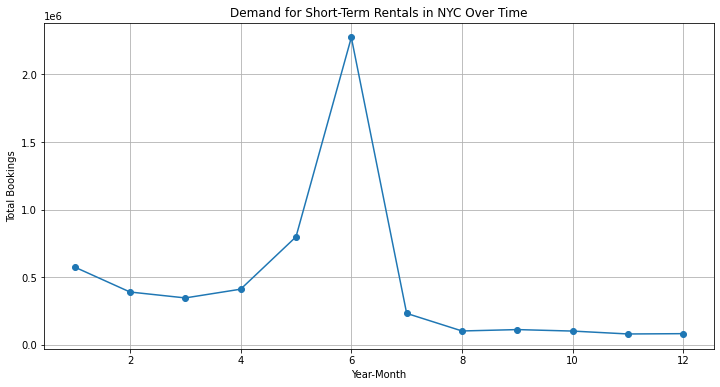

    year  month  booked_days_365
0   2019      1           575329
1   2019      2           390697
2   2019      3           346905
3   2019      4           411606
4   2019      5           798930
5   2019      6          2273740
6   2019      7           232513
7   2019      8           102454
8   2019      9           112687
9   2019     10           101691
10  2019     11            80239
11  2019     12            82549


In [75]:
# Convert the date column to a datetime object
merged_df_1['last_review'] = pd.to_datetime(merged_df_1['last_review'])

# Extract year and month from the date column
merged_df_1['year'] = merged_df_1['last_review'].dt.year
merged_df_1['month'] = merged_df_1['last_review'].dt.month
print(merged_df_1)
# Group the data by year and month and calculate the total bookings for each period
monthly_demand = merged_df_1.groupby(['year', 'month'])['booked_days_365'].sum().reset_index()
# Plot the demand over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_demand['month'], monthly_demand['booked_days_365'], marker='o')
plt.title('Demand for Short-Term Rentals in NYC Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Bookings')
plt.grid(True)
plt.show()


print(monthly_demand)